# Serie 02 Aufgaben

## Aufgabe 2.1

<b>a) Ändern Sie drei Noten im Datensatz so ab, dass der Median gleich bleibt, aber
der Mittelwert sich stark ändert.</b>

In [9]:
import numpy as np
import pandas as pd
from pandas import Series

grades = Series([4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1])
grades.median()


4.65

In [10]:
print(grades.mean())
grades2 = grades.sort_values()
grades2

4.5125


1     2.3
7     2.4
18    2.8
19    3.3
15    3.6
11    3.7
5     3.9
10    4.0
21    4.2
0     4.2
14    4.5
3     4.5
4     4.8
22    4.9
12    5.0
16    5.0
23    5.1
13    5.2
20    5.5
2     5.6
8     5.9
6     5.9
17    6.0
9     6.0
dtype: float64

In [11]:
grades2.size
grades2.index = np.arange(1, grades2.size+1)
grades2

1     2.3
2     2.4
3     2.8
4     3.3
5     3.6
6     3.7
7     3.9
8     4.0
9     4.2
10    4.2
11    4.5
12    4.5
13    4.8
14    4.9
15    5.0
16    5.0
17    5.1
18    5.2
19    5.5
20    5.6
21    5.9
22    5.9
23    6.0
24    6.0
dtype: float64

4.5 und 4.8 wird verwendet, um den Median zu berechnen (also der 12. und 13. grösste Wert).

In [12]:
grades2[11], grades2[10], grades2[9] = 1, 1, 1
grades2.index = np.arange(1, grades2.size+1)
grades2.head(n=12)

1     2.3
2     2.4
3     2.8
4     3.3
5     3.6
6     3.7
7     3.9
8     4.0
9     1.0
10    1.0
11    1.0
12    4.5
dtype: float64

In [13]:
print(grades2.median())
print(grades2.mean())

4.65
4.1000000000000005


<b>b) Erstellen Sie zu den beiden Datensätzen je ein Histogramm und einen Boxplot.
Verwenden Sie plt.subplot(...) aus Aufgabe 1.</b>

In [14]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

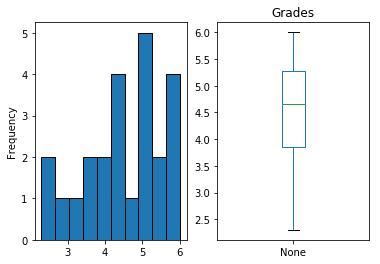

In [15]:
plt.subplot(121)
grades.plot(kind="hist", edgecolor="black")

plt.subplot(122)
grades.plot(kind="box", title='Grades')

plt.show()

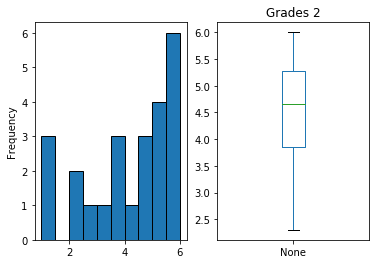

In [16]:
plt.subplot(121)
grades2.plot(kind="hist", edgecolor="black")

plt.subplot(122)
grades.plot(kind="box", title='Grades 2')

plt.show()

# Aufgabe 2.2

*21 Labors bestimmten den Kupfergehalt von 9 verschiedenen Klärschlammproben.
Die Daten stehen in der auf Ilias abgelegten Datei klaerschlamm.dat zur Verfügung.
Die erste Spalte bezeichnet das Labor, die restlichen 9 Spalten sind die verschiedenen
Klärschlammproben.*

**a) Erstellen Sie für jede Probe einen Boxplot, und berechnen Sie jeweils das arithmetische
Mittel und den Median. Bei welchen Proben gibt es Ausreisser, und
wo unterscheiden sich arithmetischesMittel undMedianwesentlich? Beiwelchen
der 9 Proben ist es plausibel, dass die wahre Konzentration unter 400 mg/kg
liegt?**

In [35]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

schlamm = pd.read_table(r"klaerschlamm.dat", sep=" ", index_col=0)

In [36]:
schlamm = schlamm.drop("Labor",1)
schlamm.head()

,Pr1,Pr2,Pr3,Pr4,Pr5,Pr6,Pr7,Pr8,Pr9
1,233,491,428,376,200,364,474,444,351
2,253,530,453,389,191,402,495,453,371
3,240,530,460,390,200,390,480,440,350
4,243,518,456,389,186,385,483,459,369
5,244,521,446,392,193,385,481,451,357


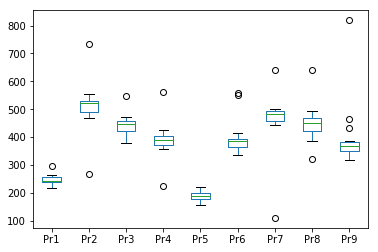

In [37]:
schlamm.plot(kind="box")

In [38]:
schlamm.describe()

,Pr1,Pr2,Pr3,Pr4,Pr5,Pr6,Pr7,Pr8,Pr9
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,246.142857,511.428571,443.428571,389.238095,188.238095,394.857143,465.523810,449.952381,388.904762
std,18.210672,76.962050,34.156363,56.642656,16.866845,56.642110,91.361162,57.069673,104.159927
min,216.000000,268.000000,378.000000,223.000000,157.000000,337.000000,110.000000,323.000000,319.000000
25%,239.000000,491.000000,422.000000,373.000000,178.000000,366.000000,456.000000,423.000000,350.000000
50%,244.000000,521.000000,446.000000,390.000000,188.000000,385.000000,481.000000,451.000000,369.000000
75%,257.000000,530.000000,459.000000,405.000000,200.000000,393.000000,493.000000,467.000000,382.000000
max,296.000000,732.000000,548.000000,562.000000,221.000000,557.000000,642.000000,639.000000,819.000000


In der describe-Tabelle ist <i>mean</i> das arithemetische Mittel und <i>50%</i> das 50%-Quartil, somit der Median.

In der Tabelle ist klar ersichtlich, dass die Proben 1, 4, 5, 6 und 9 klar unter 400mg/kg liegen. Zu prüfen bleiben nun noch 2, 3, 7 und 8.

* Bei 2 liegen die meisten Proben wirklich höcher als 400mg/kg.
* Bei 3 liegt ebenfalls der Grossteil der Proben über 400, auch wenn wenige Proben unter 4 liegen.
* Bei 7 liegt der Grossteil der Proben ebenfalls über 400, mit Ausnahme eines Ausreissers.
* Bei 8 dasselbe, die meisten Proben liegen über 400, mit Ausnahme eines Ausreissers.

**b) Erstellen Sie für jedes Labor einen Boxplot der Messfehler. Unter dem Messfehler
eines Labors bei einer Probe verstehen wir den gemessenen Wert minus
den Median über alle Labors. Welche der 21 Labors haben systematische
Fehler in ihrem Analyseverfahren? Welche haben grosse Zufallsfehler, und bei
welchen Labors ist die Qualität der Analysen besonders gut?**

In [39]:
schlamm_centered = schlamm - schlamm.median()

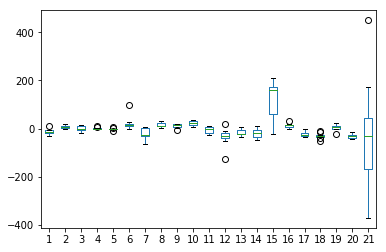

In [40]:
schlamm_centered.T.plot(kind="box")

Labore 15 und 21 haben grosse Standardabweichungen sowie systematische Fehler.

Labore 6 und 12 haben markante Ausreisser zu verzeichnen. 

Labore 1, 7, 12, 13, 14, 17, 18, 20 und 21 geben systematisch zu kleine Messwerte an (unter dem Mittelwert).

Labore 6, 8, 10, 15 geben dagegen zu grosse Werte an.

Labore 2, 3, 4, 5 und 19 geben einigermassen zuverlässige Ergebnisse an.

## Aufgabe 2.3

**Für drei Stichproben vom Umfang n = 100 wurden je ein Boxplot und die empirische
Verteilungsfunktion gezeichnet. Ordnen Sie die drei Boxplots den entsprechenden
empirischen Verteilungsfunktionen zu:**

<img src="stat_2.3_image.png" alt="Bild" width="500"/>

**Zuordnung:** 1b, 2c, 3a

## Aufgabe 2.4

Edwin Hubble untersuchte seit 1920 am Mount Wilson Observatory die Eigenschaften
von Galaxien ausserhalb der Milchstrasse. Mit Überraschung bemerkte er einen Zusammenhang
zwischen der Distanz einer Galaxie zur Erde und dessen Geschwindigkeit,
sich von der Erde fortzubewegen (Fluchtgeschwindigkeit). Hubbles ursprüngliche
Daten von 24 galaktischen Nebeln ( E. Hubble, "‘Proceedings of the National
Academy of Science 15 (1929): 168-73"’) sind in Tabelle 1 gezeigt. Die Fluchtgeschwindigkeit
ist in Kilometer pro Sekunde angegeben und konnte aufgrund der Rotverschiebung
im Lichtspektrum der Galaxien mit grosser Genauigkeit bestimmt werden.
Die Distanz einer Galaxie zur Erde wird in Megaparsec (Mpc) gemessen: ein
Megaparsec entspricht etwa 3.09 × $10^{10}$ m. Die Distanzen werden durch Vergleich
der mittleren Luminosität von Galaxien mit der Luminosität von bestimmten bekannten
Sternen bestimmt, wobei diese Methode relativ ungenau ist.

**a) Erstellen Sie von den Daten in Tabelle 1 ein Streudiagramm, in dem Sie die
Distanz versus Fluchtgeschwindigkeit aufzeichnen.**

In [67]:
hubble = pd.read_table(r"hubble.txt", sep=" ")

In [57]:
hubble

,distance,recession.velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


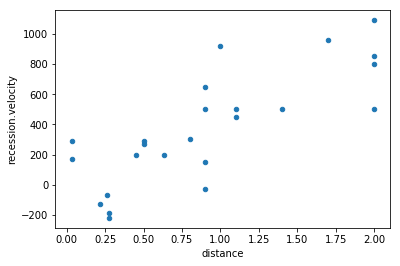

In [68]:
hubble.plot(kind="scatter", x='distance', y='recession.velocity')

<b>b) Bestimmen Sie mit dem Befehl ***np.polyfit(...)*** (siehe Skript) die Koeffizienten
$\beta_0$ und $\beta_1$ für die Regressionsgerade

$y = \beta_0 + \beta_1 \cdot x$

wobei $y$ die Distanz und $x$ die Fluchtgeschwindigkeit bezeichnet.</b>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
beta1, beta0 = np.polyfit(y=hubble["distance"], x=hubble["recession.velocity"], deg=1)
print("Beta 0: ",beta0," Beta 1: ",beta1)

Beta 0:  0.39909821584359284  Beta 1:  0.0013729361049417948


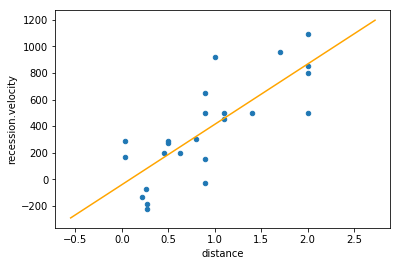

In [90]:
hubble.plot(kind="scatter", x='distance', y='recession.velocity')
b, a = np.polyfit(hubble["distance"], hubble["recession.velocity"], deg=1)
x = np.linspace(hubble["recession.velocity"].min(), hubble["recession.velocity"].max())/400
plt.plot(x, a+b*x, color="orange")
plt.show()

**c) Bestimmen Sie noch den Korrelationskoeffizienten und interpretieren Sie diesen.**

In [91]:
hubble.corr()

,distance,recession.velocity
distance,1.000000,0.789639
recession.velocity,0.789639,1.000000


Der Korrelationskoeffizient der Regression ist 0.79, also ziemlich hoch und deutet auf eine hohen linearen Zusammenhang zwischen Distanz und Regression hin.

## Aufgabe 2.5

Wir betrachten eine Studie, die 1979 in den Vereinigten Staaten durchgeführt wurde
(National Longitudinal Study of Youth, NLSY79): von 2584Amerikanern imJahr 1981
wurde der Intelligenzquotient (gemäss AFQT - armed forces qualifying test score)
gemessen; 2006 wurden dieselben Personen nach ihrem jährlichen Einkommen im
Jahr 2005 und der Anzahl Jahre Schulbildung befragt. Uns interessiert hier natürlich,
ob ein hoher IQ oder eine lange Schulbildung zu einem höheren Einkommen
führen. In der auf Ilias abgelegten Datei income.dat finden Sie den Datensatz mit
dem Einkommen, der Anzahl Jahre abgeschlossener Schulbildung und den ermittelten
Intelligenzquotienten von 2584 Amerikanern.

**a) Lesen Sie den Datensatz income.dat ein und generieren Sie Streudiagramme, in welchen das Einkommen versus Anzahl
Jahre Schulbildung und Einkommen versus Intelligenzquotient aufgetragen sind.**

In [92]:
income = pd.read_table(r"income.dat", sep=" ")

In [94]:
income.head()

,AFQT,Educ,Income2005
0,6.841,12,5500
1,99.393,16,65000
2,47.412,12,19000
3,44.022,14,36000
4,59.683,14,65000


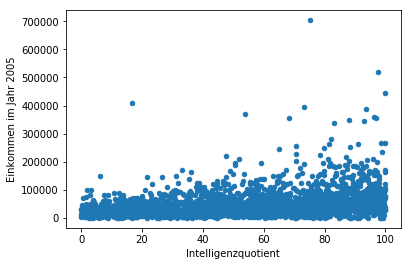

In [104]:
income.plot(kind="scatter", x="AFQT", y="Income2005")
plt.xlabel("Intelligenzquotient")
plt.ylabel("Einkommen im Jahr 2005")
plt.show()

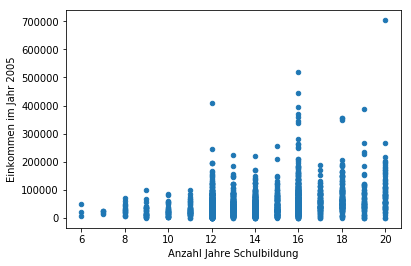

In [105]:
income.plot(kind="scatter", x="Educ", y="Income2005")
plt.xlabel("Anzahl Jahre Schulbildung")
plt.ylabel("Einkommen im Jahr 2005")
plt.show()

**b) Bestimmen Sie die Parameter $a$ und $b$ des linearen Modells $y = a + bx$ wobei $y$
das Einkommen bezeichnet und $x$ die Anzahl Jahre Schulbildung. Zeichnen Sie
die Regressionsgerade wie im Skript.**

Beta 0:  -40199.575352600026  Beta 1:  6451.4745559458


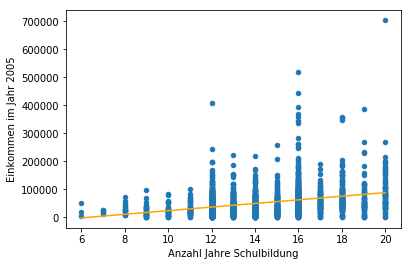

In [113]:
b, a = np.polyfit(income["Educ"], income["Income2005"], deg=1)
print("Beta 0: ", a, " Beta 1: ", b)

x = np.linspace(income["Educ"].min(),income["Educ"].max())
income.plot(kind="scatter", x="Educ", y="Income2005")

x = np.linspace(income["Educ"].min(),income["Educ"].max())
plt.plot(x, a+b*x, c="orange")
plt.xlabel("Anzahl Jahre Schulbildung")
plt.ylabel("Einkommen im Jahr 2005")
plt.show()

Im Streudiagramm mit der Regressionsgerade ist ersichtlich, dass kein klarer Zusammenhang zwischen der Bildung und dem jährlichen Einkommen besteht.

**c) Berechnen Sie die Korrelation zwischen Einkommen und Anzahl Jahre Schulbildung.
Wie angebracht ist ein Regressionsmodell für diesen Datensatz?**

In [112]:
income.corr()

,AFQT,Educ,Income2005
AFQT,1.000000,0.595160,0.308153
Educ,0.595160,1.000000,0.345647
Income2005,0.308153,0.345647,1.000000


Der Korrelationseffizient des Einkommens ist mit 0.31 ziemlich tief, woraufhin ein Regressionsmpdell für diesen Datensatz nicht angebracht ist, da kaum ein linearer Zusammenhang besteht.

## Aufgabe 2.6

**In dieser Aufgabe betrachten wir 4 Datensätze, die von Anscombe konstruiert wurden. In jedem der Datensätze gibt es eine Zielvariable y und eine erklärende Variable x.**

In [114]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

**a) Stellen Sie jeden der 4 Datensätze als Streudiagramm dar, zeichnen Sie die Regressionsgerade
ein und kommentieren Sie die Ergebnisse. Verwenden Siewieder
plt.subplot(...) aus Aufgabe 1 und plt.scatter(...).**

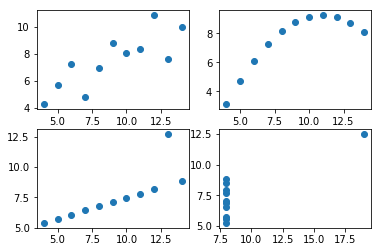

In [115]:
plt.subplot(221)
plt.scatter(x, y1)
plt.subplot(222)
plt.scatter(x, y2)
plt.subplot(223)
plt.scatter(x, y3)
plt.subplot(224)
plt.scatter(x4, y4)
plt.show()

Mangels aktueller Kenntnisse wurden die Streudiagramme inklusive Regressionsgerade den Lösungen von M. Birbaumer entnommen:

<img src="stat_2.6_regr.png" alt="Bild" width="500"/>

Klar ersichtlich ist, dass beim ersten Datensatz eine lineare Regression anzunehmen ist.

Beim zweiten Datensatz ist die Regression nicht linear.

Beim dritten Datensatz scheint eine lineare Regression vorhanden, wird jedoch durch einen Aureisser ungenau.

Beim vierten Datensatz ist die Regression auf einen Punkt fixiert.

**b) Vergleichen Sie die Schätzungen von $\beta_0$ und $\beta_1$, wobei $y = \beta_0 + \beta_1 \cdot x$.
Die Schätzungen für die Koeffizienten $\beta_0$ und $\beta_1$ des linearen Regressionsmodells
kann man mit np.polyfit(...) berechnen und numerisch auswerten.**

In [128]:
print("Modelle:   Steigung &  Achsenabschnitt (beta1 & beta0)")
print("Modell 1: ", np.polyfit(x, y1, deg=1))
print("Modell 2: ", np.polyfit(x, y2, deg=1))
print("Modell 3: ", np.polyfit(x, y3, deg=1))
print("Modell 4: ", np.polyfit(x4, y4, deg=1))

Modelle:   Steigung &  Achsenabschnitt (beta1 & beta0)
Modell 1:  [0.50009091 3.00009091]
Modell 2:  [0.5        3.00090909]
Modell 3:  [0.49972727 3.00245455]
Modell 4:  [0.49990909 3.00172727]


Die Steigung und die Achsenabschnitte der vier Modelle scheinen sich kaum zu unterscheiden, obwohl  die Darstellung der verschiedenen Daten komplett unterschiedlich ist.

**c) Berechnen Sie die Korrelationskoeffizienten mit np.corrcoef($\cdots$).**

In [132]:
print("Korrelationskoeffizienten Modell 1: ")
print(np.corrcoef(x, y1))
print("")
print("Korrelationskoeffizienten Modell 2: ")
print(np.corrcoef(x, y2))
print("")
print("Korrelationskoeffizienten Modell 3: ")
print(np.corrcoef(x, y3))
print("")
print("Korrelationskoeffizienten Modell 4: ")
print(np.corrcoef(x4, y4))

Korrelationskoeffizienten Modell 1: 
[[1.         0.81642052]
 [0.81642052 1.        ]]

Korrelationskoeffizienten Modell 2: 
[[1.         0.81623651]
 [0.81623651 1.        ]]

Korrelationskoeffizienten Modell 3: 
[[1.         0.81628674]
 [0.81628674 1.        ]]

Korrelationskoeffizienten Modell 4: 
[[1.         0.81652144]
 [0.81652144 1.        ]]
